In [228]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
import pandas as pd

In [229]:
#### Problem 1 ####


def sym_three_point(x_val, step_size):

    numerator = np.sin(x_val + step_size) - np.sin(x_val - step_size)
    denominator = 2 * step_size

    return numerator / denominator


def sym_five_point(x_val, step_size):

    numerator = (
        -np.sin(x_val + 2 * step_size)
        + 8 * np.sin(x_val + step_size)
        - 8 * np.sin(x_val - step_size)
        + np.sin(x_val - 2 * step_size)
    )
    denominator = 12 * step_size

    return numerator / denominator


def forward_two_point(x_val, step_size):

    numerator = np.sin(x_val + step_size) - np.sin(x_val)
    denominator = step_size

    return numerator / denominator


def backward_two_point(x_val, step_size):

    numerator = np.sin(x_val) - np.sin(x_val - step_size)
    denominator = step_size

    return numerator / denominator

In [230]:
step_sizes = [
    0.5,
    0.2,
    0.1,
    0.05,
    0.02,
    0.01,
    0.005,
    0.002,
    0.001,
    0.0005,
    0.0002,
    0.0001,
    0.00005,
    0.00002,
    0.00001,
]


centerpoint = 1

sym_three_point_results = [sym_three_point(centerpoint, i) for i in step_sizes]
sym_five_point_results = [sym_five_point(centerpoint, i) for i in step_sizes]
forward_two_point_results = [forward_two_point(centerpoint, i) for i in step_sizes]
backward_two_point_results = [backward_two_point(centerpoint, i) for i in step_sizes]

problem1df = pd.DataFrame(
    {
        "Step Sizes": step_sizes,
        "Symmetric Three Point": sym_three_point_results,
        "Forward Two Point": forward_two_point_results,
        "Backward Two Point": backward_two_point_results,
        "Symmetric Five Point": sym_five_point_results,
    }
)
latex_code = problem1df.to_latex(index=False)

problem1df.head()

,Step Sizes,Symmetric Three Point,Forward Two Point,Backward Two Point,Symmetric Five Point
0,0.50,0.518069,0.312048,0.724091,0.539210
1,0.20,0.536707,0.452841,0.620574,0.540274
2,0.10,0.539402,0.497364,0.581441,0.540301
3,0.05,0.540077,0.519045,0.561110,0.540302
4,0.02,0.540266,0.531852,0.548681,0.540302


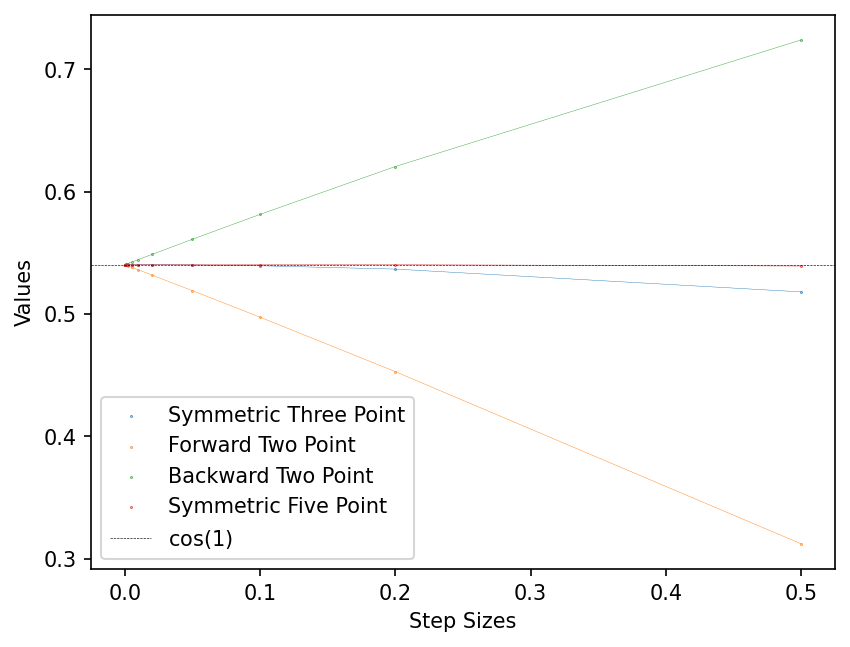

In [231]:
plt.figure(dpi=150)
for i in problem1df:
    if "Step Sizes" == i:
        pass
    else:
        plt.scatter(problem1df["Step Sizes"], problem1df[f"{i}"], label=f"{i}", s=0.1)
        plt.plot(problem1df["Step Sizes"], problem1df[f"{i}"], lw=0.2)
plt.axhline(np.cos(1), ls="dashed", c="black", label=r"$\cos(1)$", lw=0.3)
plt.legend()
plt.xlabel("Step Sizes")
plt.ylabel("Values")
# plt.savefig("Num_Methods/problem1.png")
plt.show()

In [232]:
true_value = np.cos(1)

problem1errordf = pd.DataFrame(
    {
        "Step Sizes": step_sizes,
        "Symmetric Three Point": sym_three_point_results - true_value,
        "Forward Two Point": forward_two_point_results - true_value,
        "Backward Two Point": backward_two_point_results - true_value,
        "Symmetric Five Point": sym_five_point_results - true_value,
    }
)
problem1errordf.head()

,Step Sizes,Symmetric Three Point,Forward Two Point,Backward Two Point,Symmetric Five Point
0,0.50,-0.022233,-0.228254,0.183789,-1.092613e-03
1,0.20,-0.003595,-0.087462,0.080272,-2.867922e-05
2,0.10,-0.000900,-0.042939,0.041138,-1.798865e-06
3,0.05,-0.000225,-0.021257,0.020807,-1.125295e-07
4,0.02,-0.000036,-0.008450,0.008378,-2.881474e-09


In [251]:
# Constants
l = 1
r_min = 0.01  # fm
r_max = 10  # fm
N = 1000
r0 = 1.27  # fm
A = 16  # Atomic mass
a = 0.67  # fm
R = r0 * A ** (1 / 3)  # fm
V0 = 51  # MeV


# Define grid
step_size = (r_max - r_min)/(N-1)
r_vect = np.linspace(r_min, r_max, N)

# Define Woods-Saxon potential
Vf = -V0 / (1 + np.exp((r_vect - R) / a))

# Define angular momentum term
ell_term = l * (l + 1) / r_vect**2


# Define Hamiltonian matrix
ham_mat = (-2 * np.eye(N) + np.eye(N, k=1) + np.eye(N, k=-1)) / (2*(step_size**2))
H = -ham_mat + np.diag(ell_term) + np.diag(Vf)

# Solve eigenvalue problem
eigenvalues, eigenvectors = np.linalg.eigh(H)


In [252]:
# Convert energies to MeV
eigenvalues_mev = eigenvalues
bound_indices = eigenvalues_mev < 0
bound_energies = eigenvalues_mev[bound_indices]
bound_wavefunctions = eigenvectors[:, bound_indices]

#normalization
for i in range(bound_wavefunctions.shape[1]):
    norm = np.sqrt(np.sum(bound_wavefunctions[:, i] ** 2) * step_size)
    bound_wavefunctions[:, i] /= norm

bound_energies

array([-45.25802483, -41.24125079, -36.87776688, -32.28157592,
       -27.55361246, -22.79158784, -18.0967332 , -13.58031386,
        -9.3719165 ,  -5.63229741,  -2.5766943 ,  -0.52506229])

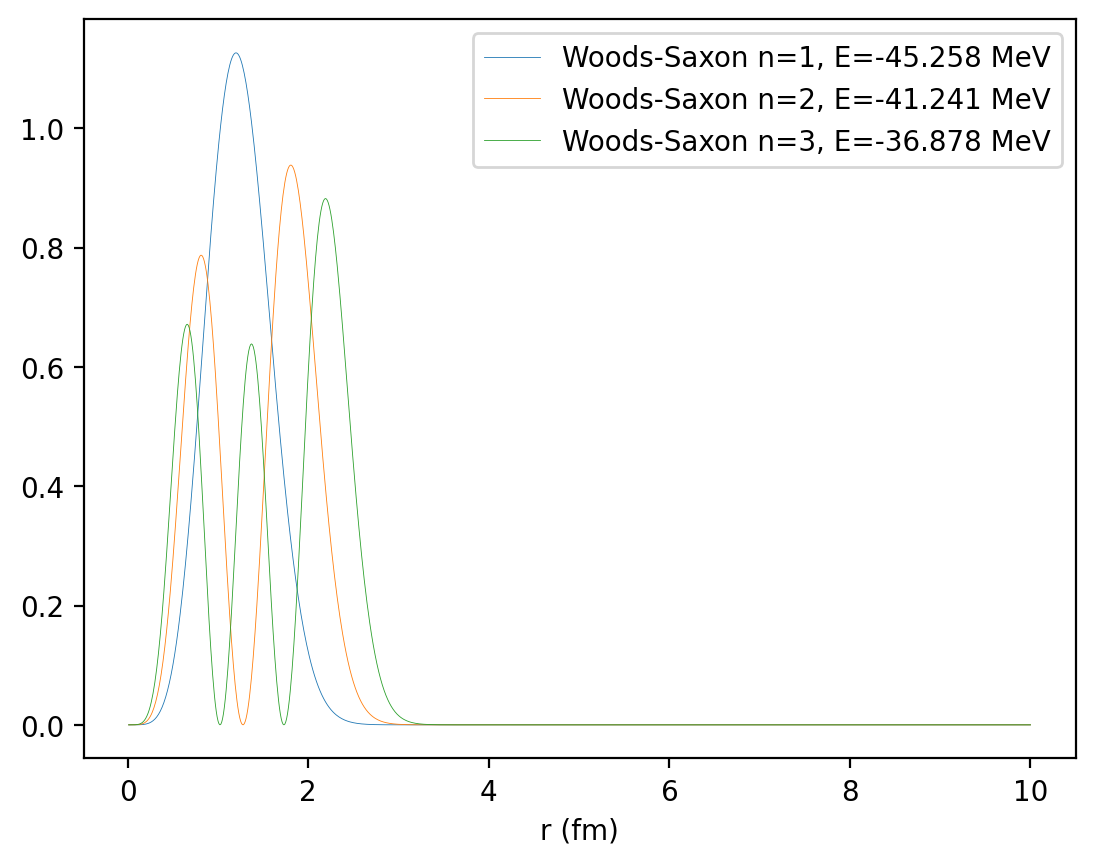

In [253]:

    
# Plot potential and wavefunction
plt.figure(dpi=200)
for i, energy in enumerate(bound_energies[:3]):  # Compare first 3 bound states
    plt.plot(
        r_vect,
        abs(bound_wavefunctions[:, i])**2,
        label=f"Woods-Saxon n={i+1}, E={energy:.3f} MeV",
        lw=0.3,
    )
plt.xlabel("r (fm)")
plt.legend()
plt.show()

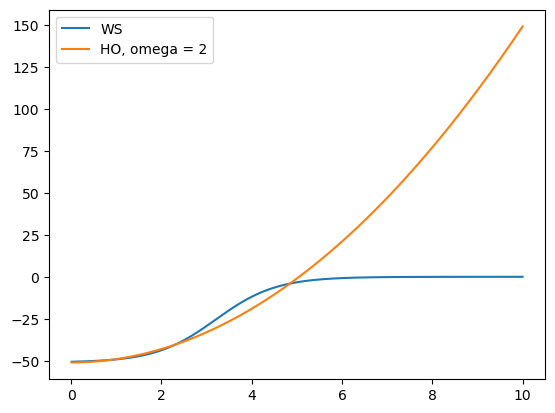

In [272]:
plt.plot(r_vect, Vf, label = 'WS')
omega = 2
HO = (1/2)*(omega**2)*(r_vect)**2 - V0

plt.plot(r_vect, HO, label = "HO, omega = 2")
plt.legend()

In [273]:
# Define Hamiltonian matrix
HOmat = -ham_mat + np.diag(ell_term) + np.diag(HO)

# Solve eigenvalue problem
eigenvalues_HO, eigenvectors_HO = np.linalg.eigh(HOmat)

In [ ]:
bound_indices_HO = eigenvalues_HO < 0
bound_energies_HO = eigenvalues_HO[bound_indices_HO]
bound_wavefunctions_HO = eigenvectors_HO[:, bound_indices_HO]

#normalization
for i in range(bound_wavefunctions_HO.shape[1]):
    normHO = np.sqrt(np.sum(bound_wavefunctions_HO[:, i] ** 2) * step_size)
    bound_wavefunctions_HO[:, i] /= normHO

bound_energies_HO

array([-44.87696078, -40.87718784, -36.87761492, -32.87824204,
       -28.87906921, -24.88009644, -20.88132375, -16.88275116,
       -12.88437868,  -8.88620633,  -4.88823412,  -0.89046207])

0
1


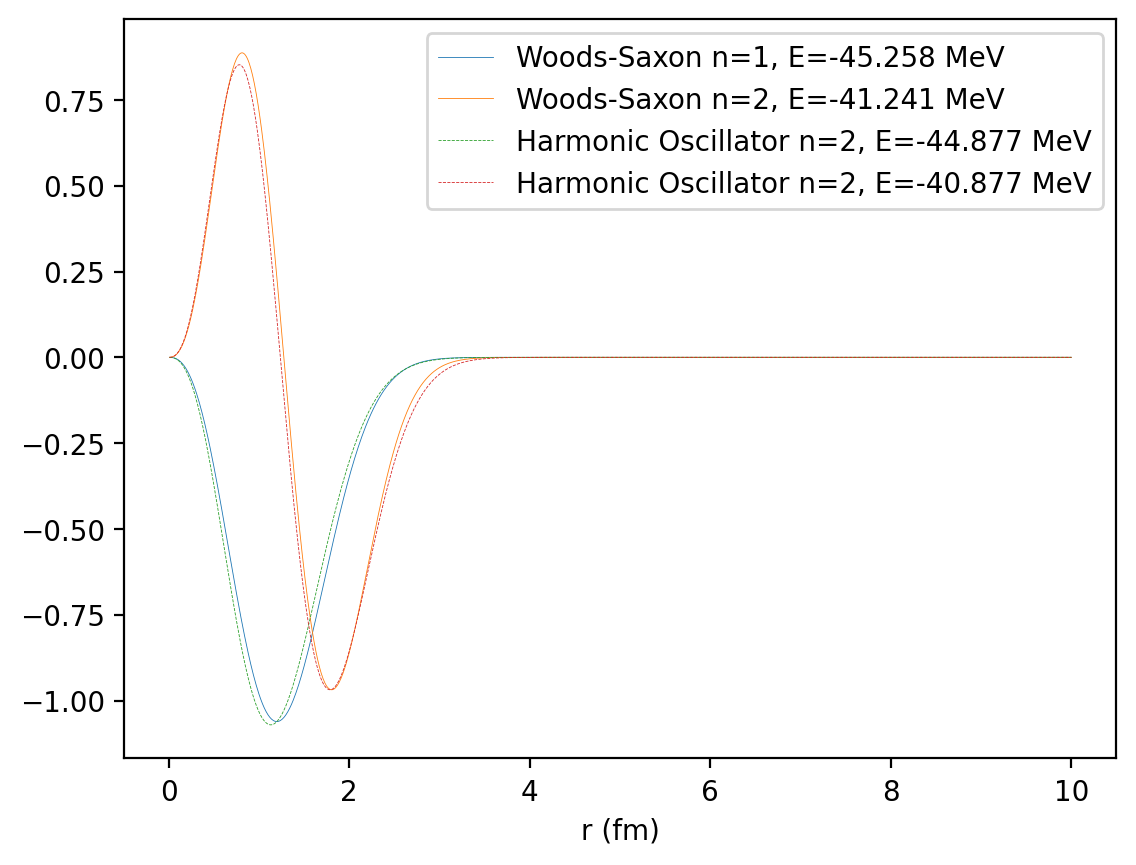

In [275]:
# Plot potential and wavefunction
plt.figure(dpi=200)
plot_num=2
for i, energy in enumerate(bound_energies[:plot_num]):  # Compare first 3 bound states
    plt.plot(
        r_vect,
        bound_wavefunctions[:, i],
        label=f"Woods-Saxon n={i+1}, E={energy:.3f} MeV",
        lw=0.3,
    )
for j, energy_HO in enumerate(bound_energies_HO[:plot_num]):  # Compare first 3 bound states
    plt.plot(
        r_vect,
        bound_wavefunctions_HO[:, j],
        label=f"Harmonic Oscillator n={i+1}, E={energy_HO:.3f} MeV",
        lw=0.3,
        ls = 'dashed'
    )
    print(j)

plt.xlabel("r (fm)")
plt.legend()


plt.show()